<a href="https://colab.research.google.com/github/leonardoLavagna/Iscas2026/blob/main/notebooks/iscas_2026_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iscas 2026
**Notebook 4**

Some plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
n = 128
S_choices = [0, n//4, n//2, 3*n//4]
p_targets = [1e-6, 1e-3, 1e-1]
t_points = 600
rng = np.random.default_rng(0)

In [26]:
def log2T_multiplicative(n, s_bits):
    """log2 T for ST^2 >= 2^n with S = 2^{s_bits} => T = 2^{(n - s_bits)/2}."""
    return (n - s_bits) / 2.0


def log2T_additive(n, s_bits):
    """log2 T for 2^n <= 2^{s_bits} + T^2 => T = sqrt(2^n - 2^{s_bits}) (for s_bits <= n)."""
    s_bits = np.asarray(s_bits)
    with np.errstate(divide='ignore', invalid='ignore'):
        t = (n / 2.0) + 0.5 * np.log2(1.0 - 2.0 ** (s_bits - n))
    # when advice already covers space, T->0 so log2 T = -inf
    t = np.where(s_bits >= n, -np.inf, t)
    return t


def p_iso_from_t(t, n):
    """Isolated success probability as function of log2 T (t)."""
    log2p = 2.0 * t - n
    return np.minimum(1.0, 2.0 ** log2p)


def p_noniso_from_t_sbits(t, s_bits, n):
    """Non-isolated success probability for scalar s_bits and array-like t."""
    t = np.asarray(t)
    a = 2.0 * t - n
    b = s_bits - n
    m = np.maximum(a, b)
    sum_term = 2.0 ** (np.minimum(0.0, a - m)) + 2.0 ** (np.minimum(0.0, b - m))
    p = np.minimum(1.0, 2.0 ** m * sum_term)
    return p


def t_needed_iso(p, n):
    """Minimal log2 T to hit success probability p in isolated model."""
    return 0.5 * (n + np.log2(p))


def t_needed_noniso(p, s_bits, n):
    """Minimal log2 T to hit success probability p in non-isolated model."""
    s_bits = np.asarray(s_bits)
    term = p - 2.0 ** (s_bits - n)
    t = np.full_like(s_bits, fill_value=-np.inf, dtype=float)
    mask = term > 0
    t[mask] = 0.5 * (n + np.log2(term[mask]))
    return t

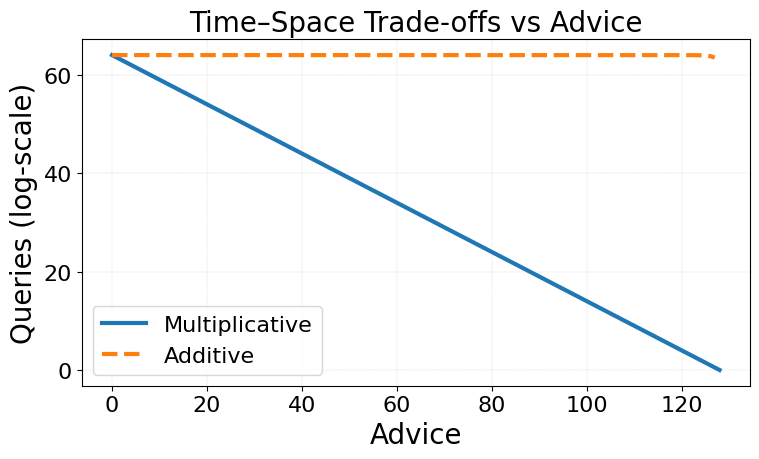

In [41]:
plt.rcParams.update({
    "font.size": 20,
    "legend.fontsize": 16,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.title_fontsize": 20,
})

s_bits = np.arange(0, n + 1)
t_mult = log2T_multiplicative(n, s_bits)
t_add  = log2T_additive(n, s_bits)

plt.figure(figsize=(8, 5))
plt.plot(s_bits, t_mult, linewidth=3, label="Multiplicative")
plt.plot(s_bits, t_add, linestyle='--', linewidth=3, label="Additive")
plt.xlabel("Advice")
plt.ylabel("Queries (log-scale)")
plt.title(f"Time–Space Trade-offs vs Advice")
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.3)
plt.tight_layout()
#out1 = f"tradeoff_comparison_log2T_vs_Sbits_n{n}.png"
#plt.savefig(out1, dpi=160)
#plt.close()

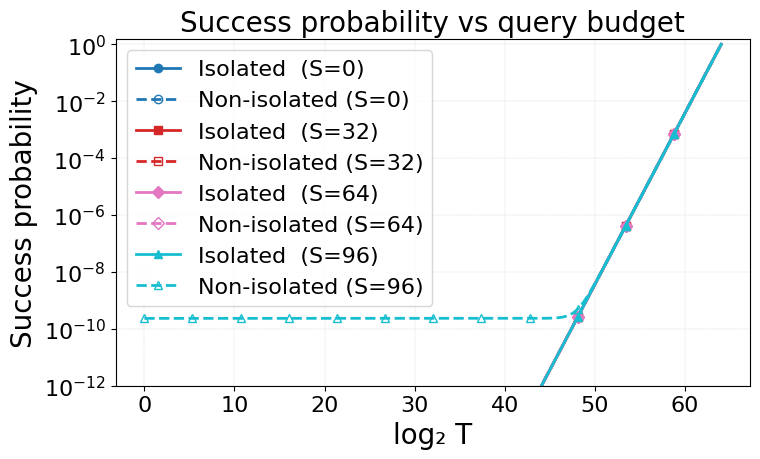

In [46]:
plt.rcParams.update({
    "font.size": 20,
    "legend.fontsize": 16,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.title_fontsize": 20,
})

t_vals = np.linspace(0, n/2, t_points)
p_iso_curve = p_iso_from_t(t_vals, n)
plt.figure(figsize=(8, 5))

markers = ['o', 's', 'D', '^', 'v', 'P', '*']
colors  = plt.cm.tab10(np.linspace(0, 1, len(S_choices)))

for idx, s in enumerate(S_choices):
    p_non = p_noniso_from_t_sbits(t_vals, s, n)
    color = colors[idx % len(colors)]
    mark  = markers[idx % len(markers)]
    plt.plot(
        t_vals, p_iso_curve,
        color=color,
        linestyle='-',
        linewidth=2,
        marker=mark,
        markevery=50,
        markersize=6,
        label=f"Isolated  (S={s})"
    )

    # Non-isolated: dashed line + same color but open markers
    plt.plot(
        t_vals, p_non,
        color=color,
        linestyle='--',
        linewidth=2,
        marker=mark,
        markerfacecolor='none',
        markevery=50,
        markersize=6,
        label=f"Non-isolated (S={s})"
    )

plt.yscale('log')
plt.ylim(1e-12, 1.5)
plt.xlabel("log₂ T")
plt.ylabel("Success probability")
plt.title(f"Success probability vs query budget")
plt.legend()
plt.grid(True, linestyle=':', linewidth=0.3)
plt.tight_layout()
plt.show()

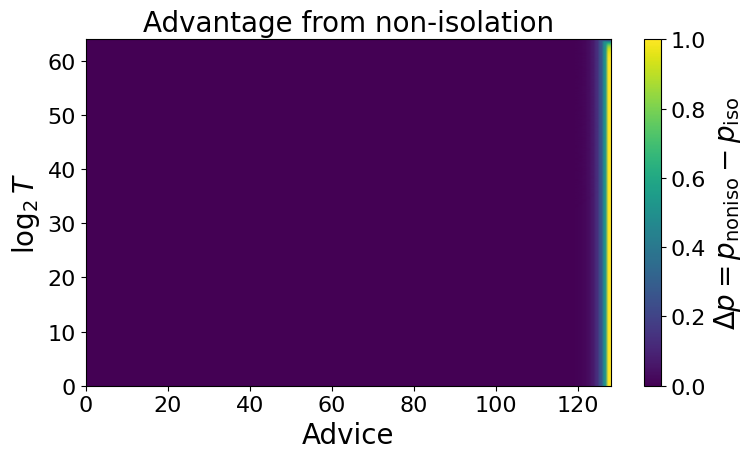

In [52]:
plt.rcParams.update({
    "font.size": 20,
    "legend.fontsize": 16,
    "axes.labelsize": 20,
    "axes.titlesize": 20,
    "xtick.labelsize": 16,
    "ytick.labelsize": 16,
    "legend.title_fontsize": 20,
})

s_grid = np.arange(0, n + 1)
t_grid = np.linspace(0, n/2, t_points)
adv = np.zeros((len(t_grid), len(s_grid)))
p_iso_allt = p_iso_from_t(t_grid, n)

for j, s in enumerate(s_grid):
    p_non = p_noniso_from_t_sbits(t_grid, s, n)
    adv[:, j] = p_non - p_iso_allt

plt.figure(figsize=(8, 5))
im = plt.imshow(
    adv,
    aspect='auto',
    origin='lower',
    extent=[s_grid.min(), s_grid.max(), t_grid.min(), t_grid.max()]
)
plt.colorbar(im, label=r"$\Delta p = p_{\mathrm{noniso}} - p_{\mathrm{iso}}$")
plt.xlabel(r"Advice")
plt.ylabel(r"$\log_{2} T$")
plt.title(f"Advantage from non-isolation")
plt.tight_layout()

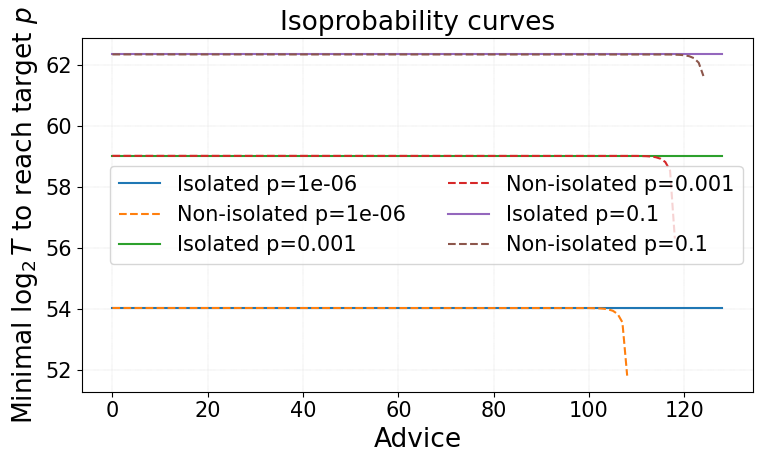

In [55]:
plt.rcParams.update({
    "font.size": 19,
    "legend.fontsize": 15,
    "axes.labelsize": 19,
    "axes.titlesize": 19,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.title_fontsize": 19,
})

s_vec = np.arange(0, n + 1)
plt.figure(figsize=(8, 5))
for pt in p_targets:
    t_iso_line = np.full_like(s_vec, t_needed_iso(pt, n), dtype=float)
    t_non_line = t_needed_noniso(pt, s_vec, n)
    plt.plot(s_vec, t_iso_line, label=f"Isolated p={pt}")
    plt.plot(s_vec, t_non_line, linestyle='--', label=f"Non-isolated p={pt}")

plt.xlabel(r"Advice")
plt.ylabel(r"Minimal $\log_{2} T$ to reach target $p$")
plt.title(f"Isoprobability curves")
plt.grid(True, linestyle=':', linewidth=0.3)
plt.legend(ncol=2)
plt.tight_layout()
